In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime, timedelta

import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import pickle

In [2]:
with open('../02_Daten/Kaffeemaschine/preprocessed_coffee.pickle', 'rb') as handle:
    df = pickle.load(handle)

In [4]:
df.head()

,time,x,y,z,day_number,day_name,Status
0,2022-01-28 10:39:28.532,0.242,0.053,4.267,4,Freitag,0
1,2022-01-28 10:39:28.742,0.245,0.066,4.292,4,Freitag,0
2,2022-01-28 10:39:28.915,0.261,0.092,4.271,4,Freitag,0
3,2022-01-28 10:39:29.237,0.240,0.083,4.260,4,Freitag,0
4,2022-01-28 10:39:29.455,0.270,0.086,4.258,4,Freitag,0


In [3]:
df.drop(['day_number','day_name','Status'], axis=1, inplace=True)

### 1. Basics

Informationen aus diesem Tutorial: https://github.com/facebookresearch/Kats/blob/main/tutorials/kats_101_basics.ipynb

aber mit unserem Kaffee-Datensatz getestet

In [4]:
from kats.consts import TimeSeriesData

In [ ]:
#df.columns = ["time", "v1", "v2", "v3"]

In [5]:
df_ts = TimeSeriesData(df)

In [9]:
print(type(df_ts))

<class 'kats.consts.TimeSeriesData'>


In [7]:
print(type(df_ts.value))

<class 'pandas.core.frame.DataFrame'>


In [8]:
df_ts

,time,x,y,z
0,2022-01-28 10:39:28.532,0.242,0.053,4.267
1,2022-01-28 10:39:28.742,0.245,0.066,4.292
2,2022-01-28 10:39:28.915,0.261,0.092,4.271
3,2022-01-28 10:39:29.237,0.240,0.083,4.260
4,2022-01-28 10:39:29.455,0.270,0.086,4.258
...,...,...,...,...
5604981,2022-02-09 15:57:11.679,0.236,0.066,4.267
5604982,2022-02-09 15:57:11.867,0.221,0.058,4.265
5604983,2022-02-09 15:57:12.062,0.182,0.023,4.277
5604984,2022-02-09 15:57:12.205,0.241,0.014,4.265


In [10]:
df_ts.is_univariate()

False

### 2. Forecasting

nicht so relevant für uns. Müsste mit richtigem DF gemacht werden, dauert dann aber wahrscheinlich sehr lange

In [6]:
df_ts_small = df[0:1000]

In [7]:
df_ts_small = TimeSeriesData(df_ts_small)

In [8]:
# import the param and model classes for Prophet model
from kats.models.prophet import ProphetModel, ProphetParams

# create a model param instance
params = ProphetParams(seasonality_mode='multiplicative') # additive mode gives worse results

# create a prophet model instance
m = ProphetModel(df_ts_small, params)

# fit model simply by calling m.fit()
m.fit()

# make prediction for next 3 month
fcst = m.predict(steps=3, freq="S")

DEBUG:cmdstanpy:cmd: where.exe tbb.dll
cwd: None
DEBUG:cmdstanpy:Adding TBB (c:\Users\pauls\AppData\Local\Programs\Python\Python38\lib\site-packages\prophet\stan_model\cmdstan-2.26.1\stan\lib\stan_math\lib\tbb) to PATH
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: C:\Users\pauls\AppData\Local\Temp\tmpwpc3hpqs\kn7edy53.json
DEBUG:cmdstanpy:input tempfile: C:\Users\pauls\AppData\Local\Temp\tmpwpc3hpqs\fmyepl3m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['C:\\Users\\pauls\\AppData\\Local\\Programs\\Python\\Python38\\Lib\\site-packages\\prophet\\stan_model\\prophet_model.bin', 'random', 'seed=48444', 'data', 'file=C:\\Users\\pauls\\AppData\\

In [9]:
fcst.head()

,time,fcst,fcst_lower,fcst_upper
0,2022-01-28 10:43:26.853,0.051295,-0.324051,0.402970
1,2022-01-28 10:43:27.853,0.050947,-0.326525,0.395073
2,2022-01-28 10:43:28.853,0.050600,-0.306009,0.430178


<AxesSubplot:xlabel='time', ylabel='y'>

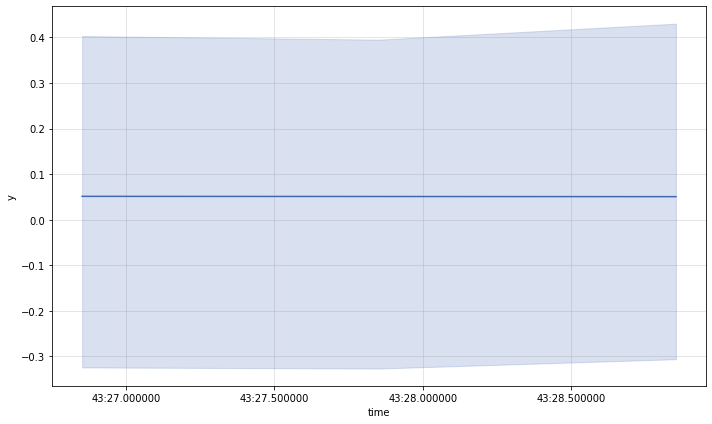

In [10]:
m.plot()

### 3. Detection

- Outlier Detection. This usually refers to a abnormal spike in a time series data, which can be detected with OutlierDetector
- Change Point Detection. This refers to a sudden change that the time series have different statistical properties before and after the change. 
- Trend Change Detection. This refers to a slow trend change on the time series data, which can be detected with Mann-Kendall detection algorithm, MKDetector

beim Kaffee-Datensatz auch nicht relevant

### 4. Feature Extraction

In [11]:
# Initiate feature extraction class
from kats.tsfeatures.tsfeatures import TsFeatures
tsFeatures = TsFeatures()

In [13]:
features_df = TsFeatures().transform(df_ts_small)

c:\Users\pauls\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\stattools.py:1910: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.


c:\Users\pauls\AppData\Local\Programs\Python\Python38\lib\site-packages\kats\tsfeatures\tsfeatures.py:713: RuntimeWarning:

divide by zero encountered in log2

c:\Users\pauls\AppData\Local\Programs\Python\Python38\lib\site-packages\kats\tsfeatures\tsfeatures.py:713: RuntimeWarning:

invalid value encountered in multiply

c:\Users\pauls\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\stattools.py:1906: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.




In [14]:
features_df

[{'length': 1000,
  'mean': 0.24047899917652832,
  'var': 0.04648289608469161,
  'entropy': 0.9192183857697614,
  'lumpiness': 0.00966527096869079,
  'stability': 0.007462640467286186,
  'flat_spots': 2,
  'hurst': 0.06077795293706838,
  'std1st_der': 0.14525588454521698,
  'crossing_points': 488,
  'binarize_mean': 0.62,
  'unitroot_kpss': 0.05135105876922539,
  'heterogeneity': 183.73139421053244,
  'histogram_mode': 0.09539997577667236,
  'linearity': 0.00014265363720695118,
  'trend_strength': 0.38271685665353183,
  'seasonality_strength': 0.36071366479346667,
  'spikiness': 8.542731426590265e-09,
  'peak': 4,
  'trough': 5,
  'level_shift_idx': 518,
  'level_shift_size': 0.13914999961853025,
  'y_acf1': 0.14682431793714987,
  'y_acf5': 0.10519678874242208,
  'diff1y_acf1': -0.46798099029723994,
  'diff1y_acf5': 0.22807458981362985,
  'diff2y_acf1': -0.6349962530973328,
  'diff2y_acf5': 0.4153468615216366,
  'y_pacf5': 0.07318228467088357,
  'diff1y_pacf5': 0.477149967947176,
  'di